# Classification Accuracy _ minute drop
we drop the minute data columns because of the high correlation with our target variable. (see documentation for explanation) 

In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("uadata_cleaned.csv")

In [3]:
df.groupby('airportdelays>=20percent').describe().tot_arr_delay_mins

,count,mean,std,min,25%,50%,75%,max
airportdelays>=20percent,,,,,,,,
0,7750.0,4811.513290,11711.179342,0.0,369.0,1049.0,3286.0,151727.0
1,8273.0,7781.713163,19458.920281,15.0,965.0,2309.0,6061.0,260512.0


In [5]:
#need to take out '%on_time','%delay_aircarrier','%delay_weather','%delay_nas','%delay_sec','%delay_lateaircraft','%cancelled','%diverted'

df = df.drop(columns=['%on_time','%delay_aircarrier','%delay_weather','%delay_nas','%delay_sec','%delay_lateaircraft','%cancelled','%diverted','tot_arr_delay_mins','carrier_delay_mins','weather_delay_mins','nas_delay_mins','security_delay_mins','lateaircraft_delay_mins'])


In [6]:
df_outcome = df['airportdelays>=20percent']

In [7]:
df['target_delayed'] = df['airportdelays>=20percent']

In [8]:
df_pred = df.drop(columns = ['Unnamed: 0', 'airportdelays>=20percent', 'delaymins>=10000'])

In [9]:
list(df_pred.columns)

['Unnamed: 0.1',
 'year',
 'month',
 'total_arrival_flights',
 'AGS',
 'ALB',
 'ANC',
 'ATL',
 'AUS',
 'AVL',
 'BDL',
 'BGR',
 'BHM',
 'BIL',
 'BNA',
 'BOI',
 'BOS',
 'BQN',
 'BTR',
 'BTV',
 'BUF',
 'BUR',
 'BWI',
 'BZN',
 'CHS',
 'CID',
 'CLE',
 'CLT',
 'CMH',
 'COS',
 'CRP',
 'CVG',
 'DAY',
 'DCA',
 'DEN',
 'DFW',
 'DLH',
 'DSM',
 'DTW',
 'EGE',
 'ELP',
 'EUG',
 'EWR',
 'FAI',
 'FAT',
 'FCA',
 'FLL',
 'FSD',
 'GEG',
 'GRR',
 'GSO',
 'GSP',
 'GUC',
 'GUM',
 'HDN',
 'HNL',
 'IAD',
 'IAH',
 'ICT',
 'IDA',
 'IND',
 'ITO',
 'JAC',
 'JAX',
 'JFK',
 'KOA',
 'LAS',
 'LAX',
 'LGA',
 'LIH',
 'MAF',
 'MCI',
 'MCO',
 'MDT',
 'MDW',
 'MEM',
 'MFE',
 'MFR',
 'MHT',
 'MIA',
 'MKE',
 'MSN',
 'MSO',
 'MSP',
 'MSY',
 'MTJ',
 'MYR',
 'OAK',
 'OGG',
 'OKC',
 'OMA',
 'ONT',
 'ORD',
 'ORF',
 'PBI',
 'PDX',
 'PHL',
 'PHX',
 'PIT',
 'PNS',
 'PSP',
 'PVD',
 'PWM',
 'RAP',
 'RDM',
 'RDU',
 'RIC',
 'RNO',
 'ROC',
 'RSW',
 'SAN',
 'SAT',
 'SAV',
 'SBA',
 'SDF',
 'SEA',
 'SFO',
 'SJC',
 'SJU',
 'SLC',
 'SMF',
 '

Target Variable
target_delayed
0    7750
1    8273
Name: target_delayed, dtype: int64


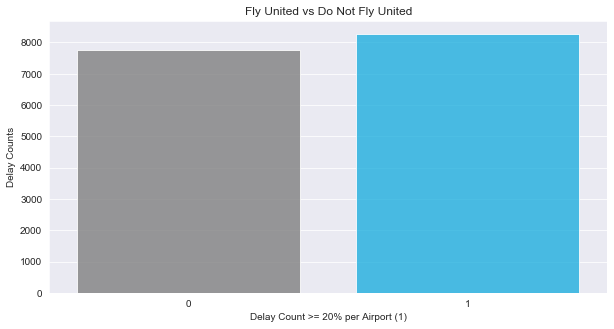

In [10]:
#Delayed Count
print('Target Variable')
print(df.groupby(['target_delayed']).target_delayed.count())

# Target Variable Countplot
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(df['airportdelays>=20percent'], alpha =.80, palette= ['gray', 'deepskyblue'])
plt.title('Fly United vs Do Not Fly United')
plt.xlabel('Delay Count >= 20% per Airport (1)')
plt.ylabel('Delay Counts')
plt.show()

In [11]:
# Identify numeric features
print('Continuous Variables')
print(df[['total_arrival_flights','tot_arr_delay_mins','carrier_delay_mins','weather_delay_mins','nas_delay_mins','security_delay_mins','lateaircraft_delay_mins']].describe().transpose())
print('--'*40)
print('Discrete Variables')
print(df.groupby('month').month.count())
print(df.groupby('year').year.count())


# Subplots of Numeric Features
sns.set_style('darkgrid')
fig = plt.figure(figsize = (20,20))
fig.subplots_adjust(hspace = .20)

ax1 = fig.add_subplot(331)
ax1.hist(df['month'], bins = 12, alpha = .50,edgecolor= 'black',color ='teal')
ax1.set_xlabel('Month', fontsize = 15)
ax1.set_ylabel('Delays (by minutes)',fontsize = 15)
ax1.set_title('Monthly Delays',fontsize = 15)

ax2 = fig.add_subplot(332)
ax2.hist(df['year'], bins = 16, alpha = .50,edgecolor= 'black',color ='teal')
ax2.set_xlabel('Year',fontsize = 15)
ax2.set_ylabel('Delays (minutes)',fontsize = 15)
ax2.set_title('Delayed Minutes by Year',fontsize = 15)

ax3 = fig.add_subplot(333)
ax3.hist(df['total_arrival_flights'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax3.set_xlabel('Total Arrival Flights',fontsize = 15)
ax3.set_ylabel('# Arrival Flights',fontsize = 15)
ax3.set_title('Total Delayed Flights(mins)',fontsize = 15)

ax4 = fig.add_subplot(334)
ax4.hist(df['tot_arr_delay_mins'], bins = 7, alpha = .50,edgecolor= 'black',color ='teal')
ax4.set_xlabel('tot_arr_delay_mins',fontsize = 15)
ax4.set_ylabel('delayed minutes',fontsize = 15)
ax4.set_title('tot_arr_delay_mins',fontsize = 15)

ax5 = fig.add_subplot(335)
ax5.hist(df['carrier_delay_mins'], bins = 7, alpha = .50,edgecolor= 'black',color ='teal')
ax5.set_xlabel('carrier_delay_mins',fontsize = 15)
ax5.set_ylabel('Delay Mins',fontsize = 15)
ax5.set_title('carrier_delay_mins',fontsize = 15)

ax6 = fig.add_subplot(336)
ax6.hist(df['weather_delay_mins'], bins = 7, alpha = .50,edgecolor= 'black',color ='teal')
ax6.set_xlabel('weather_delay_mins',fontsize = 15)
ax6.set_ylabel('Delay Mins',fontsize = 15)
ax6.set_title('weather_delay_mins',fontsize = 15)

ax7 = fig.add_subplot(337)
ax7.hist(df['nas_delay_mins'], bins = 7, alpha = .50,edgecolor= 'black',color ='teal')
ax7.set_xlabel('nas_delay_mins',fontsize = 15)
ax7.set_ylabel('Delay Mins',fontsize = 15)
ax7.set_title('nas_delay_mins',fontsize = 15)

ax8 = fig.add_subplot(338)
ax8.hist(df['security_delay_mins'], bins = 7, alpha = .50,edgecolor= 'black',color ='teal')
ax8.set_xlabel('security_delay_mins',fontsize = 15)
ax8.set_ylabel('Delay Mins',fontsize = 15)
ax8.set_title('security_delay_mins',fontsize = 15)

ax9 = fig.add_subplot(339)
ax9.hist(df['lateaircraft_delay_mins'], bins = 7, alpha = .50,edgecolor= 'black',color ='teal')
ax9.set_xlabel('lateaircraft_delay_mins',fontsize = 15)
ax9.set_ylabel('Delay Mins',fontsize = 15)
ax9.set_title('lateaircraft_delay_mins',fontsize = 15)

plt.show()

Continuous Variables


KeyError: "['lateaircraft_delay_mins', 'tot_arr_delay_mins', 'security_delay_mins', 'carrier_delay_mins', 'weather_delay_mins', 'nas_delay_mins'] not in index"

Delay Summary


target_delayed    0     1
month                    
1               611   732
2               676   668
3               690   652
4               815   525
5               593   700
6               314  1101
7               332  1063
8               526   876
9               943   342
10              922   351
11              846   414
12              482   849


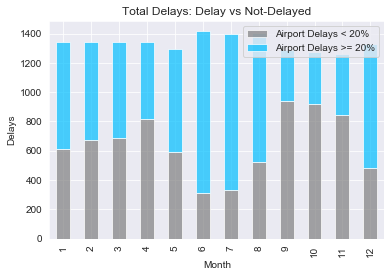

In [310]:

# Passenger class summary
print('Delay Summary')

print('\n')
print(df.groupby(['month','target_delayed']).month.count().unstack())

# Passenger class visualization

month = df.groupby(['month','target_delayed']).month.count().unstack()

p1  = month.plot(kind = 'bar', stacked = True, 
                   title = 'Total Delays: Delay vs Not-Delayed', 
                   color = ['grey','deepskyblue'], alpha = .70)

p1.set_xlabel('Month')
p1.set_ylabel('Delays')
p1.legend(['Airport Delays < 20%','Airport Delays >= 20%'])

plt.show()

Statistical Summary of Total delayed minutes, carrier delay minutes, weather delay minutes, nas delay minutes, security delay minutes and late arrivals


Was not Delayed
                          count         mean           std  min     25%  \
total_arrival_flights    7750.0   550.013548   1230.706362  1.0   57.00   
tot_arr_delay_mins       7750.0  4811.513290  11711.179342  0.0  369.00   
carrier_delay_mins       7750.0  1409.070581   3201.809055  0.0  103.00   
weather_delay_mins       7750.0   184.724774    574.137612  0.0    0.00   
nas_delay_mins           7750.0  1229.816903   4149.392424  0.0   43.00   
security_delay_mins      7750.0     3.067226     30.447062  0.0    0.00   
lateaircraft_delay_mins  7750.0  1984.833806   4582.333710  0.0  146.25   

                            50%      75%       max  
total_arrival_flights     126.0   395.00   11055.0  
tot_arr_delay_mins       1049.0  3286.00  151727.0  
carrier_delay_mins        336.0  1015.75   29576.0  
weather_delay_min

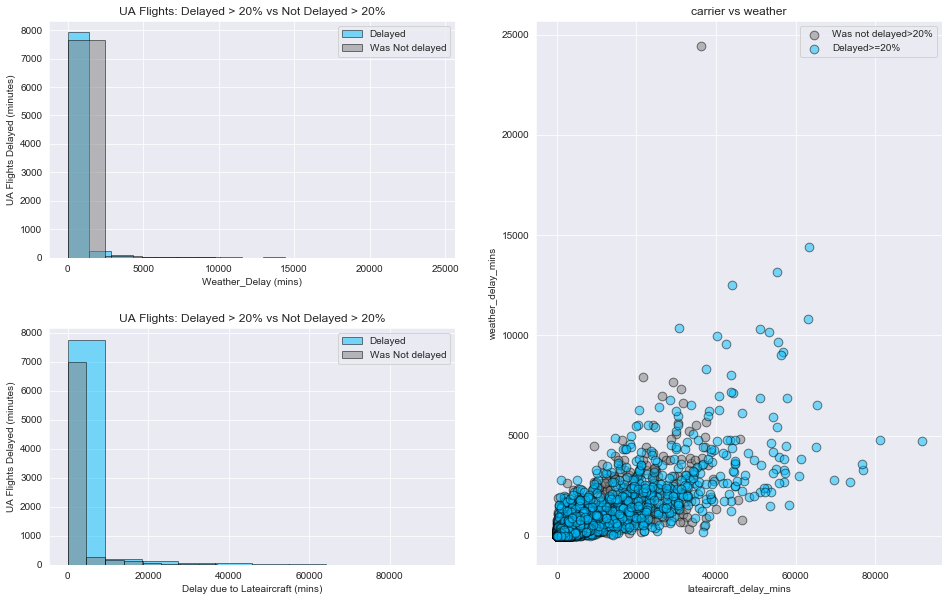

In [311]:
# Statistical summary of continuous variables 
        # 'tot_arr_delay_mins',
        #  'carrier_delay_mins',
        #  'weather_delay_mins',
        #  'nas_delay_mins',
        #  'security_delay_mins',
        #  'lateaircraft_delay_mins',

print('Statistical Summary of Total delayed minutes, carrier delay minutes, weather delay minutes, nas delay minutes, security delay minutes and late arrivals')
print('\n')
print('Was not Delayed')
print(df[df['target_delayed']==0][['total_arrival_flights','tot_arr_delay_mins','carrier_delay_mins','weather_delay_mins','nas_delay_mins','security_delay_mins','lateaircraft_delay_mins']].describe().transpose())
print('--'*40)
print('Survived')
print(df[df['target_delayed']==1][['total_arrival_flights','tot_arr_delay_mins','carrier_delay_mins','weather_delay_mins','nas_delay_mins','security_delay_mins','lateaircraft_delay_mins']].describe().transpose())

print('\n')
print('-------------------------------------------')
print('Plotting Weather Delay Minutes vs Late Aircraft Minutes')
print('-------------------------------------------')
# Subplots of Numeric Features
sns.set_style('darkgrid')
fig = plt.figure(figsize = (16,10))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(221)
ax1.hist(df[df['target_delayed']==1].weather_delay_mins, bins = 10, label = 'Delayed', alpha = .50, edgecolor = 'black',color = 'deepskyblue')
ax1.hist(df[df['target_delayed']==0].weather_delay_mins, bins = 10, label ='Was Not delayed', alpha = .50,edgecolor= 'black',color ='grey')
ax1.set_title('UA Flights: Delayed > 20% vs Not Delayed > 20%')
ax1.set_xlabel('Weather_Delay (mins)')
ax1.set_ylabel('UA Flights Delayed (minutes)')
ax1.legend(loc = 'upper right')

ax2 = fig.add_subplot(223)
ax2.hist(df[df['target_delayed']==1].lateaircraft_delay_mins, bins = 10, label = 'Delayed', alpha = .50, edgecolor = 'black',color = 'deepskyblue')
ax2.hist(df[df['target_delayed']==0].lateaircraft_delay_mins, bins = 10, label ='Was Not delayed', alpha = .50,edgecolor= 'black',color ='grey')
ax2.set_title('UA Flights: Delayed > 20% vs Not Delayed > 20%')
ax2.set_xlabel('Delay due to Lateaircraft (mins)')
ax2.set_ylabel('UA Flights Delayed (minutes)')
ax2.legend(loc = 'upper right')


ax3 = fig.add_subplot(122)
ax3.scatter(x = df[df['target_delayed']==0].lateaircraft_delay_mins, y = df[df['target_delayed']==0].weather_delay_mins,
                        alpha = .50,edgecolor= 'black',  c = 'grey', s= 75, label = 'Was not delayed>20%')
ax3.scatter(x = df[df['target_delayed']==1].lateaircraft_delay_mins, y = df[df['target_delayed']==1].weather_delay_mins,
                        alpha = .50,edgecolors= 'black',  c = 'deepskyblue', s= 75, label = 'Delayed>=20%')
ax3.set_xlabel('lateaircraft_delay_mins')
ax3.set_ylabel('weather_delay_mins')
ax3.set_title('carrier vs weather')
ax3.legend()

plt.show()

In [12]:
df = df.drop(columns="Unnamed: 0")
df = df.drop(columns='delaymins>=10000')
df = df.drop(columns='airportdelays>=20percent')

In [13]:
df = df.drop(columns='tot_arr_delay_mins')

KeyError: "['tot_arr_delay_mins'] not found in axis"

# Make month and year dummy variables before modeling 

In [14]:
df.head()

,Unnamed: 0.1,year,month,total_arrival_flights,AGS,ALB,ANC,ATL,AUS,AVL,...,SRQ,STL,STT,SYR,TPA,TUL,TUS,TVC,TYS,target_delayed
0,0,2003,6,150.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2003,6,90.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2003,6,130.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2003,6,365.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,2003,6,60.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df = df.drop(columns="Unnamed: 0.1")

In [17]:
month_dummies = pd.get_dummies(df['month'], prefix='month', drop_first=True)
year_dummies = pd.get_dummies(df['year'], prefix='year', drop_first=True)

In [18]:
df = df.drop(['month','year'], axis=1)

In [19]:
df = pd.concat([df, month_dummies, year_dummies], axis=1)

In [20]:
df.head()

,total_arrival_flights,AGS,ALB,ANC,ATL,AUS,AVL,BDL,BGR,BHM,...,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019
0,150.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,90.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,130.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,365.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,60.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
list(df.columns)

['total_arrival_flights',
 'AGS',
 'ALB',
 'ANC',
 'ATL',
 'AUS',
 'AVL',
 'BDL',
 'BGR',
 'BHM',
 'BIL',
 'BNA',
 'BOI',
 'BOS',
 'BQN',
 'BTR',
 'BTV',
 'BUF',
 'BUR',
 'BWI',
 'BZN',
 'CHS',
 'CID',
 'CLE',
 'CLT',
 'CMH',
 'COS',
 'CRP',
 'CVG',
 'DAY',
 'DCA',
 'DEN',
 'DFW',
 'DLH',
 'DSM',
 'DTW',
 'EGE',
 'ELP',
 'EUG',
 'EWR',
 'FAI',
 'FAT',
 'FCA',
 'FLL',
 'FSD',
 'GEG',
 'GRR',
 'GSO',
 'GSP',
 'GUC',
 'GUM',
 'HDN',
 'HNL',
 'IAD',
 'IAH',
 'ICT',
 'IDA',
 'IND',
 'ITO',
 'JAC',
 'JAX',
 'JFK',
 'KOA',
 'LAS',
 'LAX',
 'LGA',
 'LIH',
 'MAF',
 'MCI',
 'MCO',
 'MDT',
 'MDW',
 'MEM',
 'MFE',
 'MFR',
 'MHT',
 'MIA',
 'MKE',
 'MSN',
 'MSO',
 'MSP',
 'MSY',
 'MTJ',
 'MYR',
 'OAK',
 'OGG',
 'OKC',
 'OMA',
 'ONT',
 'ORD',
 'ORF',
 'PBI',
 'PDX',
 'PHL',
 'PHX',
 'PIT',
 'PNS',
 'PSP',
 'PVD',
 'PWM',
 'RAP',
 'RDM',
 'RDU',
 'RIC',
 'RNO',
 'ROC',
 'RSW',
 'SAN',
 'SAT',
 'SAV',
 'SBA',
 'SDF',
 'SEA',
 'SFO',
 'SJC',
 'SJU',
 'SLC',
 'SMF',
 'SNA',
 'SPN',
 'SRQ',
 'STL',
 'STT'

In [22]:
df.to_csv("UA_clean_data.csv")

# Modeling 

In [23]:
df = pd.read_csv("UA_clean_data.csv")

In [25]:
df = df.drop(columns=['Unnamed: 0'])

In [26]:
#creating matrix of features 
X = df.drop('target_delayed', axis = 1)

#assigning target variable 
y = df['target_delayed']

#creating a list of features
feature_cols = X.columns

In [27]:
X.head()

,total_arrival_flights,AGS,ALB,ANC,ATL,AUS,AVL,BDL,BGR,BHM,...,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019
0,150.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,90.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,130.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,365.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,60.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Use x and y variables to split the training data into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [29]:
import warnings
warnings.filterwarnings("ignore") 

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
dictionary = dict(zip(list(X_train.columns), list(logreg.coef_[0])))

In [31]:
dictionary

{'total_arrival_flights': -0.0001564956615144683,
 'AGS': 1.0700794650682395,
 'ALB': 0.8845786486765824,
 'ANC': 0.45144184458039743,
 'ATL': 0.938972659347348,
 'AUS': -0.30727058879631164,
 'AVL': 0.6874971364219904,
 'BDL': 0.23170536200850636,
 'BGR': -0.9545819828842772,
 'BHM': -0.7881103735912015,
 'BIL': -0.4912195760298562,
 'BNA': 0.8114965466465065,
 'BOI': 0.11401551227897867,
 'BOS': 0.6495491666298089,
 'BQN': 1.8424709667228238,
 'BTR': 0.39656809476610383,
 'BTV': 1.0845717690904648,
 'BUF': 0.8756462142404292,
 'BUR': -1.361542420466539,
 'BWI': -0.16550677166084019,
 'BZN': -0.029245313889281994,
 'CHS': -0.8769820266860661,
 'CID': -0.09699654865553722,
 'CLE': -0.3487390138601925,
 'CLT': -0.044694810019528616,
 'CMH': -0.07539732518653815,
 'COS': -0.9546080115454834,
 'CRP': -0.23858501436097013,
 'CVG': 0.3410835795711998,
 'DAY': 0.5052320455146747,
 'DCA': -0.15728203235110766,
 'DEN': -0.9128796793830858,
 'DFW': 0.38462617391484305,
 'DLH': 1.076802718039224

In [32]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

# Classification Accuracy 

In [33]:
# calculate accuracy
# establish a baseline ..... dummy classifier or use on tuned niave model 
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.7488766849725412


# Null Accuracy 

In [34]:
y_test.value_counts()

1    2061
0    1945
Name: target_delayed, dtype: int64

In [35]:
# calculate the percentage of ones
y_test.mean()

0.5144782825761358

In [36]:
# calculate the percentage of zeros
1 - y_test.mean()

0.4855217174238642

In [37]:
# calculate null accuracy (for binary classification problems coded as 0/1)
max(y_test.mean(), 1 - y_test.mean())

0.5144782825761358

- Compare the True and predicted response values


In [38]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [1 1 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0]
Pred: [1 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0]


Conclusion:
- Classification accuracy is the easiest classification metric to understand
- it does not tell you the underlying distribution of response values
- it does not tell you what "types" of errors your classifier is making

# Confusion Matrix

Table that describes the performance of a classification model

In [39]:
# IMPORTANT: first argument is true values, second argument is predicted values
print(metrics.confusion_matrix(y_test, y_pred_class))

[[1407  538]
 [ 468 1593]]


In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_class)
classes = ['Delayed<20%', 'Delayed>=20%']

In [41]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[1407  538]
 [ 468 1593]]


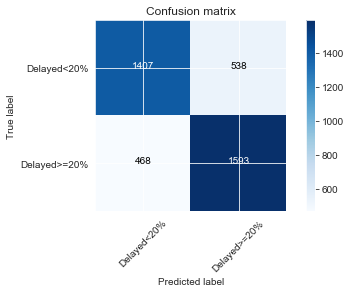

In [42]:
import itertools
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [43]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [1 1 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0]
Pred: [1 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0]


In [44]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

# Metrics computed from a confusion matrix

In [45]:
# Specificity 
print(TN / float(TN + FP))

0.7233933161953727


In [46]:
# False Positive Rate - When the actual value is negative, how often is the prediction incorrect?

print(FP / float(TN + FP))

0.2766066838046273


In [47]:
THRESHOLD = 0.5
preds = np.where(logreg.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[metrics.accuracy_score(y_test, preds), metrics.recall_score(y_test, preds),
                   metrics.precision_score(y_test, preds), metrics.f1_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "F1"])

,0
accuracy,0.748877
recall,0.772926
precision,0.747536
F1,0.760019


In [48]:
THRESHOLD = 0.75
preds = np.where(logreg.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[metrics.accuracy_score(y_test, preds), metrics.recall_score(y_test, preds),
                   metrics.precision_score(y_test, preds), metrics.f1_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "F1"])

,0
accuracy,0.680230
recall,0.442018
precision,0.874280
F1,0.587174


In [49]:
# print the first 10 predicted responses
logreg.predict(X_test)[0:10]

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 0])

In [50]:
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[0:10, :]

array([[0.41315876, 0.58684124],
       [0.330658  , 0.669342  ],
       [0.9111375 , 0.0888625 ],
       [0.35406286, 0.64593714],
       [0.95391403, 0.04608597],
       [0.1401666 , 0.8598334 ],
       [0.48868046, 0.51131954],
       [0.0075303 , 0.9924697 ],
       [0.20909276, 0.79090724],
       [0.78003466, 0.21996534]])

In [51]:
# print the first 10 predicted probabilities for class 1
logreg.predict_proba(X_test)[0:10, 1]

array([0.58684124, 0.669342  , 0.0888625 , 0.64593714, 0.04608597,
       0.8598334 , 0.51131954, 0.9924697 , 0.79090724, 0.21996534])

In [52]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

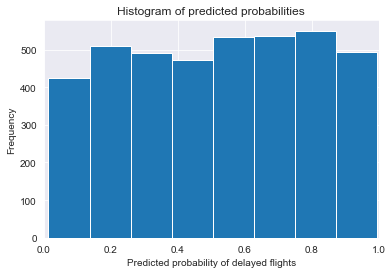

In [53]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of delayed flights')
plt.ylabel('Frequency')

In [54]:
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.3)[0]

In [55]:
y_pred_prob[0:10]

array([0.58684124, 0.669342  , 0.0888625 , 0.64593714, 0.04608597,
       0.8598334 , 0.51131954, 0.9924697 , 0.79090724, 0.21996534])

In [56]:
y_pred_class[0:10]

array([1., 1., 0., 1., 0., 1., 1., 1., 1., 0.])

In [57]:
print(confusion)

[[1407  538]
 [ 468 1593]]


In [58]:
print(metrics.confusion_matrix(y_test, y_pred_class))

[[ 916 1029]
 [ 200 1861]]


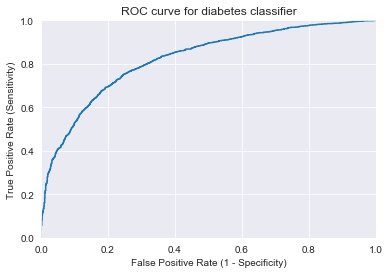

In [59]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [60]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [61]:
evaluate_threshold(0.5)

Sensitivity: 0.7729257641921398
Specificity: 0.7233933161953727


In [62]:
evaluate_threshold(0.3)

Sensitivity: 0.9029597282872392
Specificity: 0.47095115681233934


In [165]:
pip install xgboost

     |████████████████████████████████| 686kB 2.6MB/s eta 0:00:01
  Stored in directory: /Users/michellevenables/Library/Caches/pip/wheels/e9/48/4d/de4187b5270dff71d3697c5a7857a1e2d9a0c63a28b3462eeb
Successfully built xgboost
Note: you may need to restart the kernel to use updated packages.


# ROC_AUC Score

In [63]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.8231427327688035


In [64]:
import warnings
warnings.filterwarnings("ignore")

# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.4487982748363956

- **AUC** is scale-invariant. It measures how well predictions are ranked, rather than their absolute values.
- AUC is **classification-threshold-invariant**. It measures the quality of the model's predictions irrespective of what classification threshold is chosen.

# KNN

**Standardization** - Scaling Data with StandardScaler

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

In [66]:
from sklearn.metrics import f1_score
# F1 = 2 * (precision * recall) / (precision + recall)

f1_score(y_test, y_predict, average='weighted')

0.6143784695906787

In [67]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test, y_predict, labels=None, sample_weight=None))
print(classification_report(y_test, y_predict))

[[1113  832]
 [ 710 1351]]
              precision    recall  f1-score   support

           0       0.61      0.57      0.59      1945
           1       0.62      0.66      0.64      2061

    accuracy                           0.62      4006
   macro avg       0.61      0.61      0.61      4006
weighted avg       0.61      0.62      0.61      4006



In [68]:
# search for an optimal value of K for KNN
k_range = list(range(1, 11))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    score = f1_score(y_test, y_predict, average='weighted')
    k_scores.append( score)
print(k_scores)

[0.6143784695906787, 0.6095873489019263, 0.628688754065798, 0.6549720230544748, 0.6414016144720771, 0.6533270294267891, 0.6517693632419541, 0.6700241589711867, 0.6784570078545519, 0.6734642486617656]


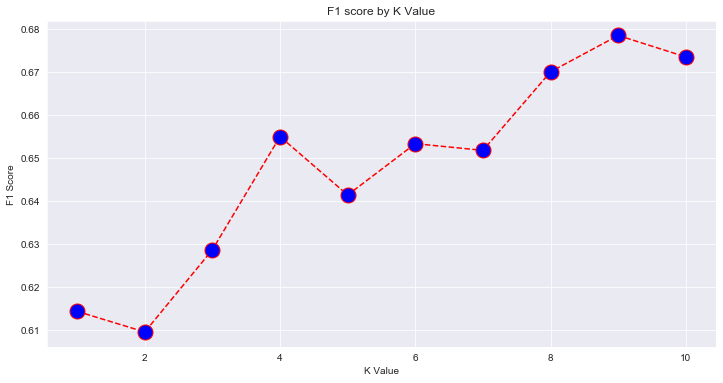

In [69]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 11), k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=15)
plt.title('F1 score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('F1 Score') 
plt.show()

# Classification Decision Tree

In [70]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier


In [71]:
ctree=DecisionTreeClassifier(max_depth = 5)
ctree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

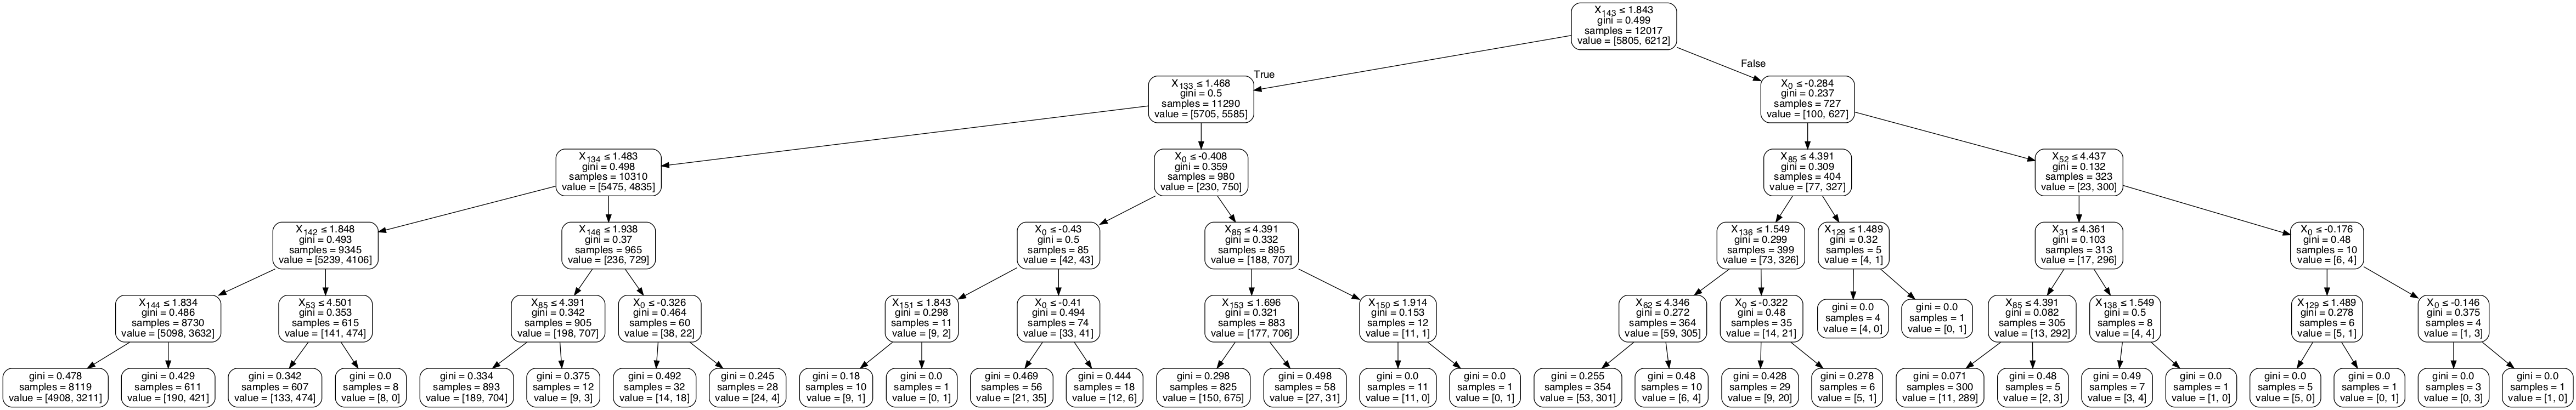

In [72]:
dot_data = StringIO()
export_graphviz(ctree, out_file=dot_data,  
                rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [73]:
clasPred = ctree.predict(X_test)

In [74]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, clasPred)

0.6657513729405892

[0.40379208615556195, 0.3981677223495584, 0.4080900511914692, 0.3497451719349565, 0.37202712922010306, 0.3843237905207387, 0.40161191212170066, 0.39299744626764893, 0.3665955998545175]


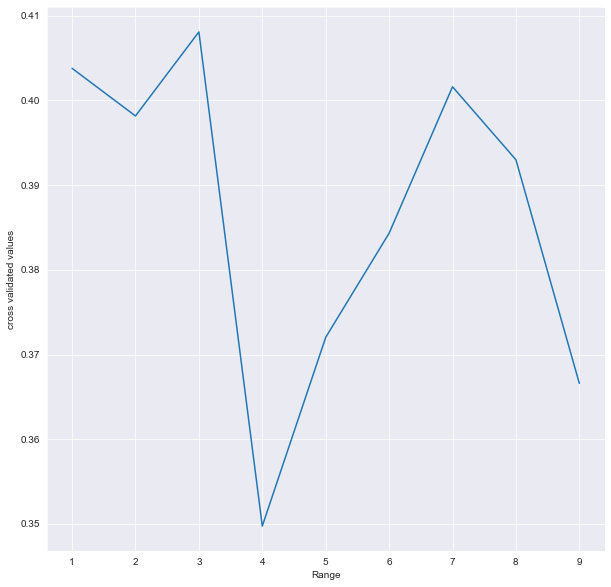

In [75]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(ctree, X, y, cv = 10)
score.mean()
depth_range = range(1,10)
val = []
for depth in depth_range:
    ctree = DecisionTreeClassifier(max_depth = depth)
    depth_score = cross_val_score(ctree, X, y, cv = 10)
    val.append(depth_score.mean())
print(val)
plt.figure(figsize = (10,10))
plt.plot(depth_range, val)
plt.xlabel('Range')
plt.ylabel('cross validated values')
plt.show()

# Random Forest Model 

In [191]:
np.random.seed(0)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

target = df['target_delayed']
df.drop("target_delayed", axis=1, inplace=True)

KeyError: 'target_delayed'

In [192]:
data_train, data_test, target_train, target_test = train_test_split(df, target, 
                                                                   test_size = 0.25, random_state=123)

In [193]:
clf = RandomForestClassifier(n_estimators=100, max_depth=8,random_state=1)
clf.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [194]:
print(clf.feature_importances_)

[3.39586072e-02 6.69842491e-05 6.21684162e-04 1.04838918e-03
 1.72005822e-03 1.24837600e-04 2.34330870e-04 4.10232703e-04
 1.61680149e-04 2.35947671e-05 4.69713711e-04 5.44522546e-05
 5.51819156e-04 1.69576176e-03 4.96920745e-03 1.22590354e-04
 5.99159736e-04 9.49900401e-04 1.87769715e-03 2.48667652e-04
 2.04712176e-04 5.56171490e-04 8.59678047e-05 8.41810612e-04
 3.31843994e-04 4.10327020e-04 6.90359467e-04 9.31574180e-05
 1.26236006e-03 4.04753987e-04 4.08729012e-04 7.62779454e-03
 5.06476882e-04 1.03055305e-04 3.99470756e-04 5.92886765e-04
 3.44937870e-04 1.32401739e-04 2.56889188e-04 6.17307011e-03
 1.77779958e-04 1.90663349e-04 3.29019546e-05 4.03760242e-04
 2.37392642e-03 1.84522430e-04 6.78899410e-04 3.50839104e-04
 0.00000000e+00 2.22284464e-04 9.27862163e-04 3.03245748e-04
 2.66632981e-03 6.79035257e-03 6.79853354e-04 6.07338413e-04
 0.00000000e+00 8.71472599e-04 1.06260943e-03 6.29597028e-04
 4.35107574e-04 5.34161988e-04 5.22961224e-03 8.14124712e-04
 8.87718942e-04 1.027248

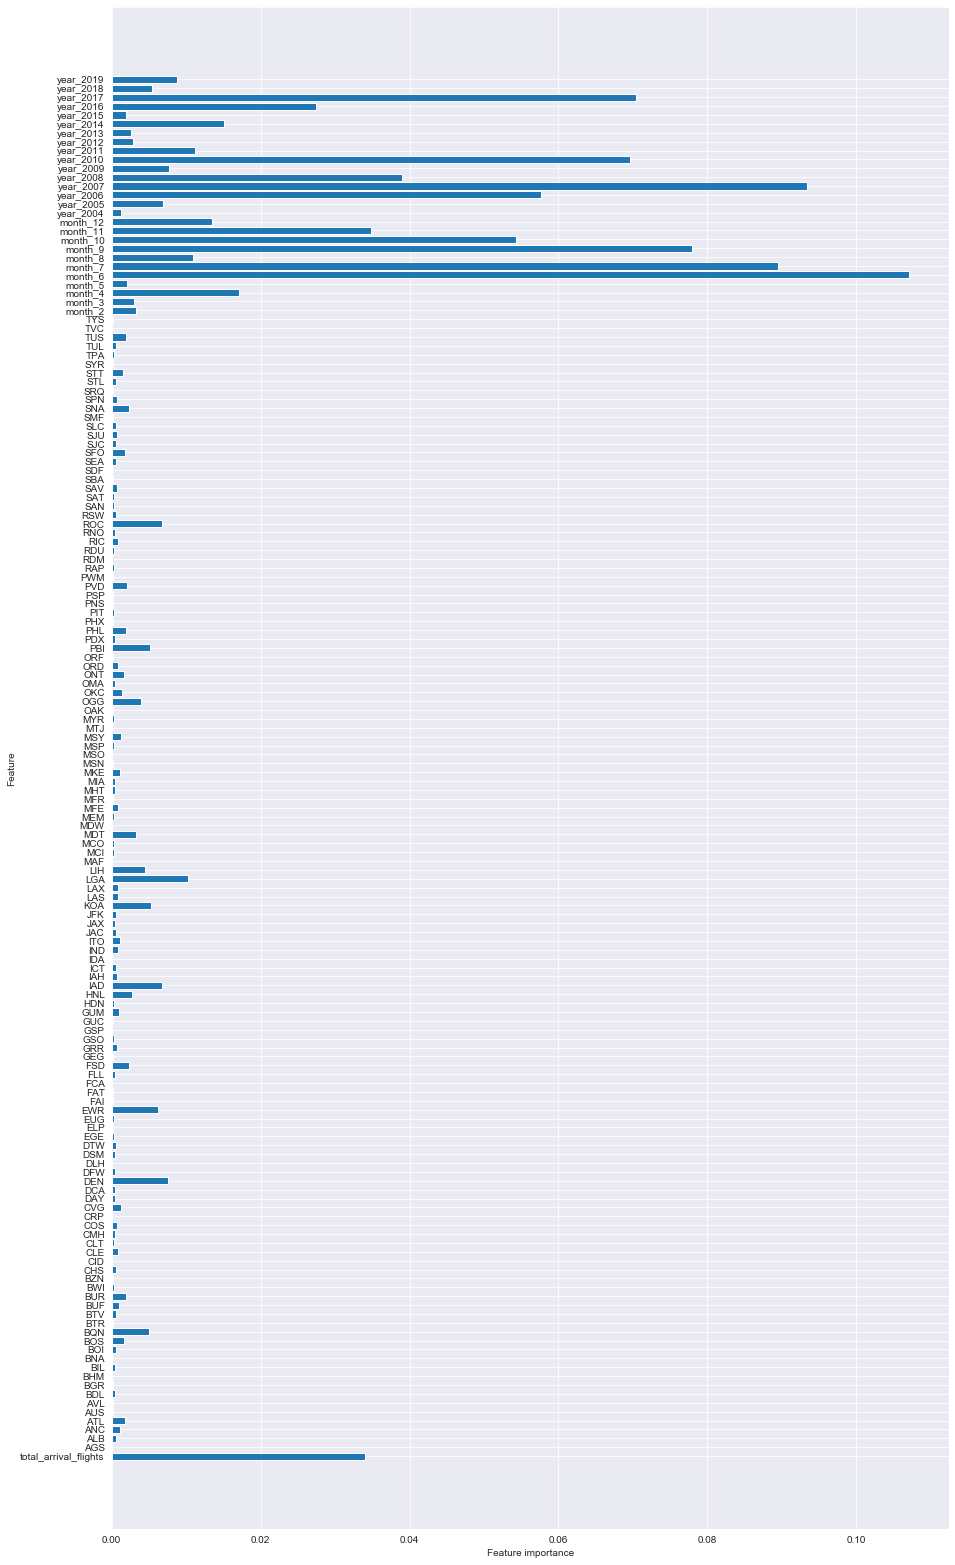

In [195]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(15,28))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), df.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances(clf)

In [196]:
pred = clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[1309  646]
 [ 419 1632]]
              precision    recall  f1-score   support

           0       0.76      0.67      0.71      1955
           1       0.72      0.80      0.75      2051

    accuracy                           0.73      4006
   macro avg       0.74      0.73      0.73      4006
weighted avg       0.74      0.73      0.73      4006



In [197]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 73.41%


# Bagged Trees 

In [198]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=8), n_estimators=20)

In [199]:
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=8,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
       

In [200]:
bagged_tree.score(X_train, y_train)

0.7149038861612715

In [201]:
bagged_tree.score(X_test, y_test)

0.6964553170244633

# Base Model 
**Fitting a random forests model**

In [202]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 8)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [203]:
forest.score(X_train, y_train)

0.7560123158858284

In [204]:
forest.score(X_test, y_test)

0.7326510234648028

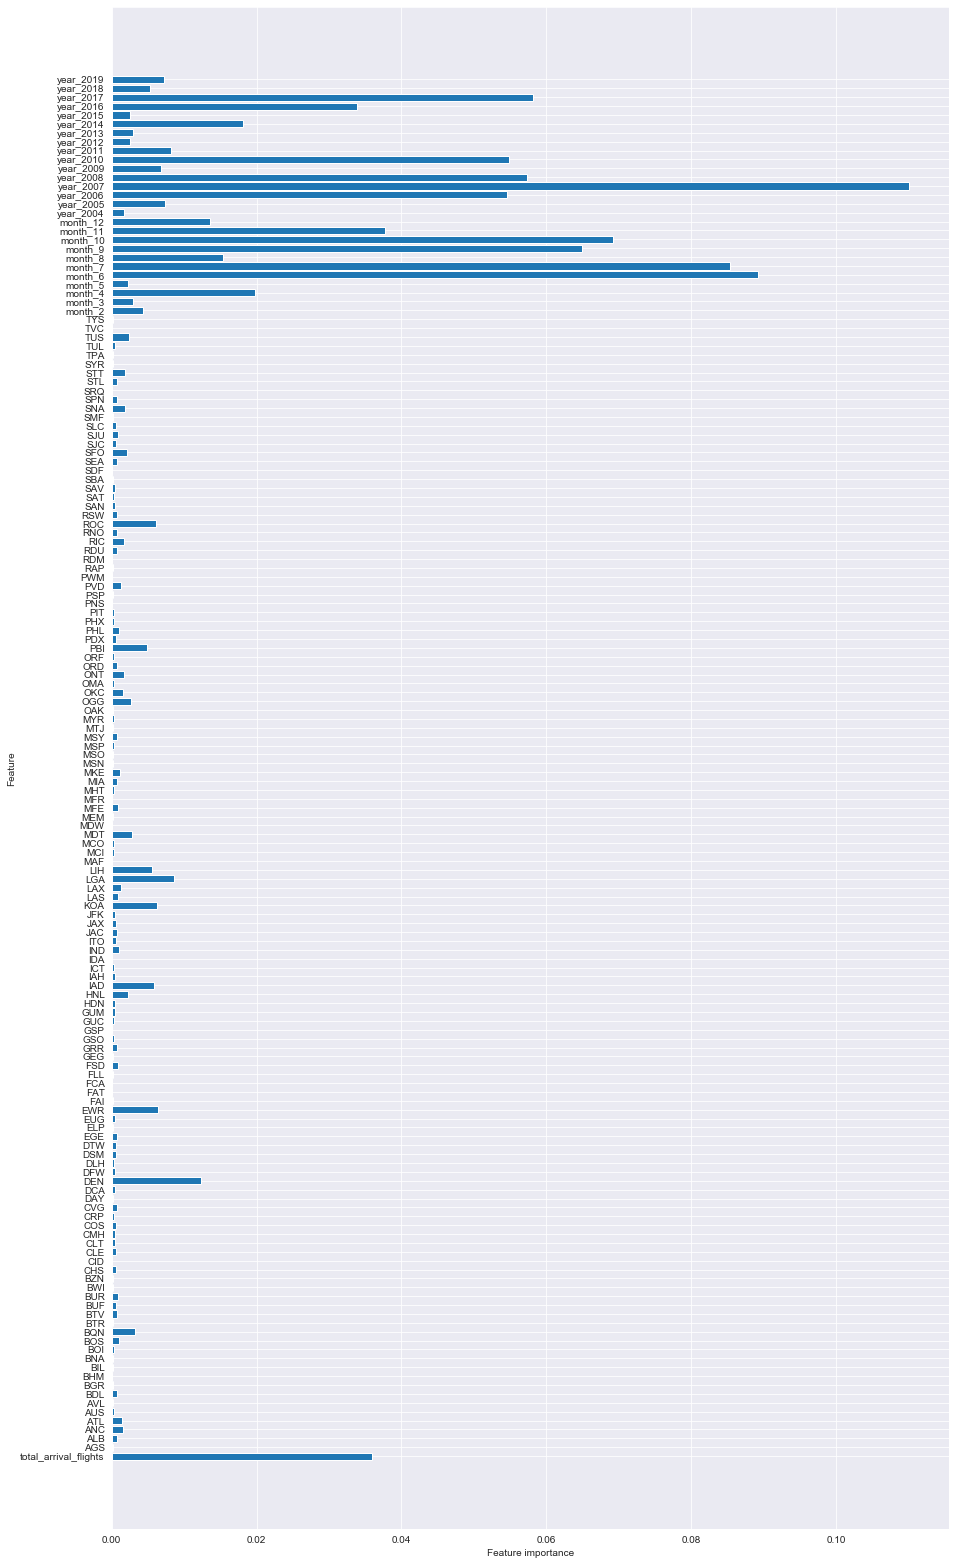

In [205]:
plot_feature_importances(forest)

**Look at the trees in your forest**

In [206]:
forest_2 = RandomForestClassifier(n_estimators = 5, max_features= 100, max_depth= 10)
forest_2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=100, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [207]:
rf_tree_1 = forest_2.estimators_[0]

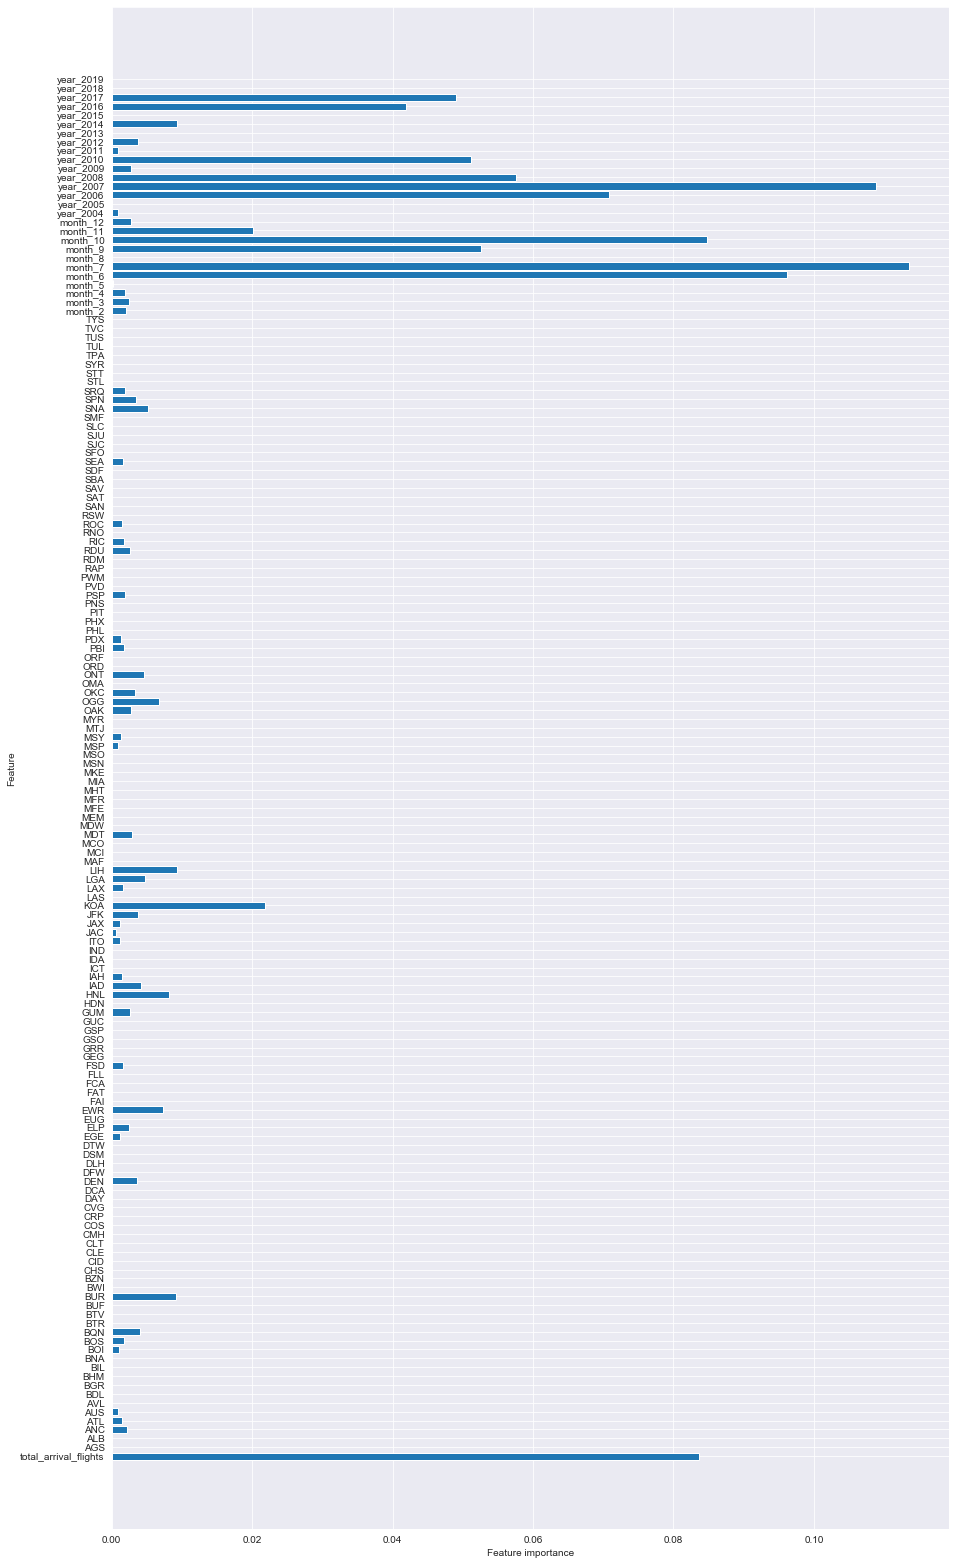

In [208]:
plot_feature_importances(rf_tree_1)

In [209]:
rf_tree_2 = forest_2.estimators_[1]

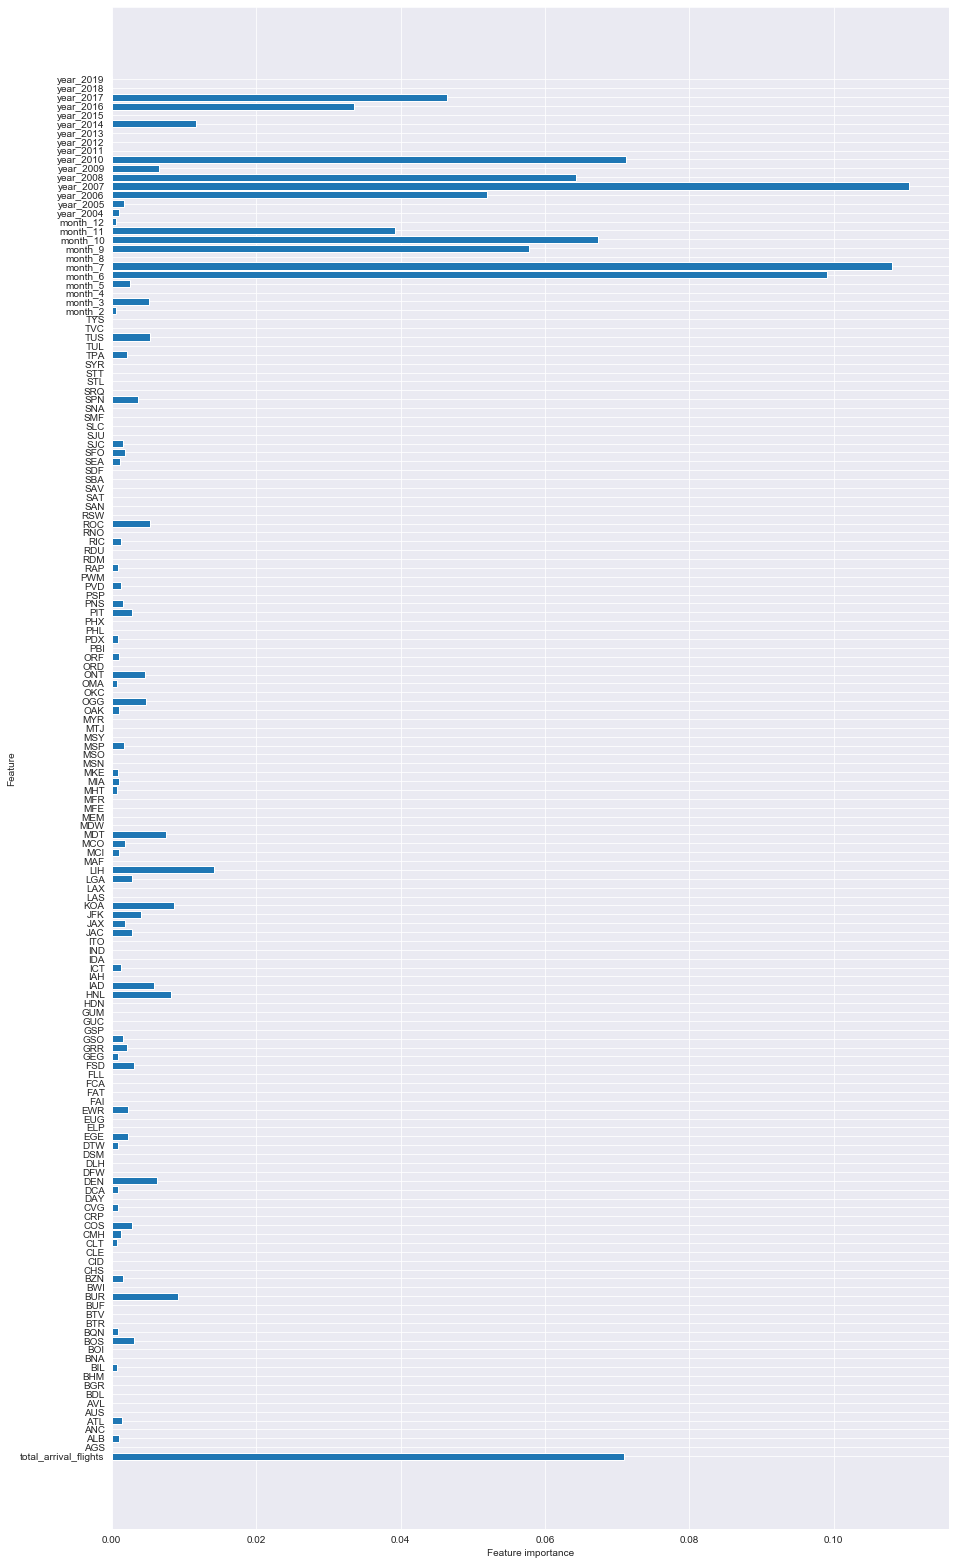

In [210]:
plot_feature_importances(rf_tree_2)

# GridSearch CV

In [98]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
import time

In [99]:
display(df.describe())


,total_arrival_flights,AGS,ALB,ANC,ATL,AUS,AVL,BDL,BGR,BHM,...,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019
count,16023.000000,16023.000000,16023.000000,16023.000000,16023.000000,16023.000000,16023.000000,16023.000000,16023.000000,16023.000000,...,16023.000000,16023.000000,16023.000000,16023.000000,16023.000000,16023.000000,16023.000000,16023.000000,16023.000000,16023.000000
mean,502.242339,0.000312,0.011983,0.009861,0.012170,0.012170,0.001373,0.012170,0.000374,0.000187,...,0.054047,0.052986,0.060226,0.059851,0.056544,0.059602,0.065281,0.071397,0.076203,0.052175
std,1159.197257,0.017663,0.108811,0.098814,0.109648,0.109648,0.037030,0.109648,0.019348,0.013682,...,0.226118,0.224013,0.237912,0.237219,0.230976,0.236755,0.247029,0.257495,0.265331,0.222387
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,127.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,385.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11055.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [100]:
dt_clf = DecisionTreeClassifier()

dt_cv_score = cross_val_score(dt_clf, X_train, y_train, cv=3)
mean_dt_cv_score = np.mean(dt_cv_score)

print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")

Mean Cross Validation Score: 71.23%


**This model did fine overall, significalntly better than we would expect forom random guessing**

# Hyperparameter Tuning

**1. Combinatoric Grid Searching**

In [211]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state = 42)
from pprint import pprint


# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(clf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


# Cross Validation
- Random Hyperparameter Grid

In [212]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(X) for X in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(X) for X in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [213]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


**Random Search Training** and fit it like any Scikit-Learn Model:

- More iterations will cover a wider search space and more cv folds reduces the chances of overfitting, but raising each will increase the run time. Machine learning is a field of trade-offs, and performance vs time is one of the most fundamental.

In [104]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
clf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
clf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
clf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 18.0min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [214]:
clf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': False}

# Evaluate Random Search # 1

In [215]:
better_model = RandomForestClassifier(n_estimators= 600, min_samples_split = 5, max_depth=20, bootstrap=False, random_state=38)
better_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=38, verbose=0,
                       warm_start=False)

In [216]:
#base model
base_accuracy = forest.score(X_train, y_train)
base_accuracy

0.7560123158858284

In [217]:
#better model
better_model.score(X_train, y_train)

0.8415577931264042

In [218]:
#base model 
forest.score(X_test, y_test)

0.7326510234648028

In [219]:
#better model
better_model.score(X_test, y_test)

0.7523714428357464

# Evaluation # 2  

In [224]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 20, 30, 40],
    'min_samples_leaf': [2, 3, 4],
    'min_samples_split': [5, 8, 10],
    'n_estimators': [100, 600, 800, 1000]
}
# Create a based model
clf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [225]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:  7.9min finished


{'bootstrap': True,
 'max_depth': 40,
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 1000}

In [226]:
best_grid = grid_search.best_estimator_
grid_accuracy = best_grid.score(X_train, y_train)
grid_accuracy

0.8238329033868687

In [227]:
best_grid.score(X_test, y_test)

0.7633549675486769

In [228]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 8.97%.


# Gradient Boosting 

In [229]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [230]:
target = df['target_delayed']
df.drop('target_delayed', axis=1, inplace=True)

KeyError: 'target_delayed'

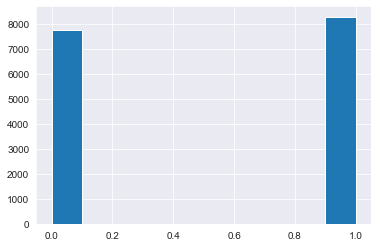

In [231]:
target.hist()

In [248]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.25, random_state = 42)

In [249]:
adaboost_clf = AdaBoostClassifier()
gbt_clf = GradientBoostingClassifier()

adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [250]:
gbt_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [251]:
adaboost_train_preds = adaboost_clf.predict(X_train)
adaboost_test_preds = adaboost_clf.predict(X_test)
gbt_clf_train_preds = gbt_clf.predict(X_train)
gbt_clf_test_preds = gbt_clf.predict(X_test)

In [252]:
def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds)
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    
print("Training Metrics")
display_acc_and_f1_score(y_train, adaboost_train_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_train, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, adaboost_test_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')

Training Metrics
Model: AdaBoost
Accuracy: 0.7329616376799534
F1-Score: 0.7422696972130753

Model: Gradient Boosted Trees
Accuracy: 0.7555130232171091
F1-Score: 0.771681691016475

Testing Metrics
Model: AdaBoost
Accuracy: 0.7381427858212681
F1-Score: 0.7485015583792854

Model: Gradient Boosted Trees
Accuracy: 0.7496255616575137
F1-Score: 0.7655994391212901


In [253]:
adaboost_confusion_matrix = confusion_matrix(y_test, adaboost_test_preds)
adaboost_confusion_matrix

array([[1396,  561],
       [ 488, 1561]])

In [254]:
gbt_confusion_matrix = confusion_matrix(y_test, gbt_clf_test_preds)
gbt_confusion_matrix

array([[1365,  592],
       [ 411, 1638]])

In [255]:
adaboost_classification_report = classification_report(y_test, adaboost_test_preds)
print(adaboost_classification_report)

              precision    recall  f1-score   support

           0       0.74      0.71      0.73      1957
           1       0.74      0.76      0.75      2049

    accuracy                           0.74      4006
   macro avg       0.74      0.74      0.74      4006
weighted avg       0.74      0.74      0.74      4006



In [256]:
gbt_classification_report = classification_report(y_test, gbt_clf_test_preds)
print(gbt_classification_report)

              precision    recall  f1-score   support

           0       0.77      0.70      0.73      1957
           1       0.73      0.80      0.77      2049

    accuracy                           0.75      4006
   macro avg       0.75      0.75      0.75      4006
weighted avg       0.75      0.75      0.75      4006



In [257]:
print('Mean Adaboost Cross-Val Score (k=5):')
print(cross_val_score(adaboost_clf, df, target, cv=3).mean())

Mean Adaboost Cross-Val Score (k=5):
0.5352966050706056


In [258]:
print('Mean GBT Cross-Val Score (k=5):')
print(cross_val_score(gbt_clf, df, target, cv=5).mean())

Mean GBT Cross-Val Score (k=5):
0.40511110332053735


**These models didn't do poorly, but we could probably do a bit better by tuning some of the important parameters such as the Learning Rate.**

# XGBoost

In [166]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import xgboost as xgb

In [243]:
labels = df['target_delayed']
labels_removed_df = df.drop('target_delayed', axis=1, inplace=False)

KeyError: 'target_delayed'

In [244]:
X_train, X_test, y_train, y_test = train_test_split(labels_removed_df, labels)

In [245]:
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)
training_preds = clf.predict(X_train)
val_preds = clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Training Accuracy: 75.84%
Validation accuracy: 74.81%


In [246]:
param_grid = {
    "learning_rate": [0.1],
    'max_depth': [6],
    'min_child_weight': [10],
    'subsample': [ 0.7],
    'n_estimators': [5, 30, 100, 250],
}

In [247]:
grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(labels_removed_df, labels)

best_parameters = grid_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
val_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("")
print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 6
min_child_weight: 10
n_estimators: 250
subsample: 0.7

Training Accuracy: 79.16%
Validation accuracy: 79.21%


**That's a big improvement! Accuracy has increased, as well as no more signs of the model overfitting.**

In [261]:
from time import time

# SVM

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42) 

In [268]:
from sklearn.svm import SVC  
tic = time()
svclassifier = SVC(kernel='rbf', C=0.5) 
svclassifier.fit(X_train, y_train) 
y_pred = svclassifier.predict(X_test)
toc = time()
print("run time is {} seconds".format(toc-tic))

run time is 39.30121088027954 seconds


In [269]:
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 
print("The accuracy score is" + " "+ str(accuracy_score(y_test, y_pred)))

[[ 829 1128]
 [ 577 1472]]
              precision    recall  f1-score   support

           0       0.59      0.42      0.49      1957
           1       0.57      0.72      0.63      2049

    accuracy                           0.57      4006
   macro avg       0.58      0.57      0.56      4006
weighted avg       0.58      0.57      0.56      4006

The accuracy score is 0.5743884173739391


In [270]:
from sklearn.svm import SVC  
tic = time()
svclassifier = SVC(kernel='sigmoid', C=0.5) 
svclassifier.fit(X_train, y_train) 
y_pred = svclassifier.predict(X_test)
toc = time()
print("run time is {} seconds".format(toc-tic))

run time is 22.37886095046997 seconds


In [271]:
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 
print("The accuracy score is" + " "+ str(accuracy_score(y_test, y_pred)))

[[ 916 1041]
 [ 907 1142]]
              precision    recall  f1-score   support

           0       0.50      0.47      0.48      1957
           1       0.52      0.56      0.54      2049

    accuracy                           0.51      4006
   macro avg       0.51      0.51      0.51      4006
weighted avg       0.51      0.51      0.51      4006

The accuracy score is 0.5137294058911632
